$$\newcommand{\mean}[1]     {\langle #1 \rangle}$$
$$\newcommand{\spins}       {\mathbb{S}}$$
$$\newcommand{\spinsmu}     {\mathbb{S}_{\mu}}$$
$$\newcommand{\spini}       {s_{i}}$$
$$\newcommand{\spinj}       {s_{j}}$$
$$\newcommand{\Ham}         {\mathcal{H}}$$
$$\newcommand{\kB}          {k_B}$$
$$\newcommand{\ra}          {\rightarrow}$$

# Assignment 3: Ising model

## Introduction

In the lectures, we've been discussing the physics, some of the history, and the computational methods that underlie the analysis of the deceptively simple *Ising model*. In this assignment, you will bring much of that to bear by evaluating the evolution towards equilibrium of the Ising model system in 2 dimensions, and analyze the properties of the system once it reaches equilibrium. Given the extensive nature of this assigment, and the fact that it relies on much of what we have discussed so far, you have 2 weeks to complete it. That is, the assigments are due on *October 31st, 2019 at 2pm* (via `GitHub` as usual).

I will include some of the background material that we discussed in lecture also here in order to keep this assignment somewhat self contained.

## Table of Contents

1. [Ising model](#ising-model)
1. [Monte Carlo methods](#monte-carlo)
1. [The Metropolis algorithm](#metropolis)
1. [Assignment description](#assignment)
    1. [Exercise 1: Basic lattice setup](#ex1)
    1. [Exercise 2: Randomly choose & flip a lattice point](#ex2)
    1. [Exercise 3: Nearest neighbors](#ex3)
    1. [Exercise 4: Calculating the energy of the lattice](#ex4)
    1. [Exercise 5: Calculate the magnetisation of the lattice](#ex5)
    1. [Exercise 6: Implement the Metropolis algorithm](#ex6)
    1. [Exercise 7: Perform measurements](#ex7)

***

## The Ising Model <a class="anchor" name="ising-model"></a>

In seeking to explain a particular phenomenon in physics, namely the onset of ferromagnetism, Wilhelm Lenz proposed in 1924 that his PhD student, Ernst Ising, should solve a puzzling 1-dimensional model of  [[arXiv:1706.01764](https://arxiv.org/abs/1706.01764)]. This model was meant to attempt to describe the interaction of 

> "elementary magnetic units, which prefer alignment"

a problem which belonged to the new and undeveloped quantum mechanics. In order to make any progress at all, Ising started in 1 dimension with the task of calculating analytically the macroscopic magnetization with the methods of statistical mechanics. This deceptively *"simple"* model for a set of spin states $\mathbb{S} = \{s_i\}$, with a Hamiltonian, \Ham, for a given interaction coupling, $J$, and magnetic field, $H$, given by:

  \begin{equation}
    \Ham = -J \sum_{\mean{ij}}^N \spini \spinj - H \sum_i \spini "
  \end{equation} 

Given a set of $N$ spins, the Ising model has $2^N$ states $\mathbb{S} = \{s_i\}$ in $d=2$ dimensions. 

* What happens to the system when we let it evolve according to the laws of statistical mechanics? 
* Does the average spin remain random? 
* How does the application of an external field affect its evolution? 
* Can we calculate a specific heat for this system (the temperature change required to raise the system's energy by a given amount)?

The energy $E_{\mu}$ of a particular microstate $\mu$ of this (discrete) system is given by the operator \Ham acting on that microstate, or specific  $\spins = \spinsmu$. We assume that although the system is in an \bluebf{equilibrium state} (i.e. the energy of a particular element is proportional to the temperature, $T$), it is a dynamic one in which each element's energy fluctuates as it exchanges energy with its environment. The probability for the ensemble \spins to have energy $E_{\mu}$ is 
  
  \begin{equation}
    P(\spinsmu) = \frac{e^{-\beta E_{\mu}}}{\sum_{\mu} e^{-\beta E_{\mu}}},
  \end{equation} 

  And the mean and variance of the energy $\mean{E}$ (or *any* observable) is given by 
  
  \begin{eqnarray}
    \mean{E} &=& \sum_{\mu} E_{\mu} P(\spinsmu) = \frac{1}{Z} \sum_{\mu} E_{\mu} e^{-\beta E_{\mu}} \\
    Var(E) = \mean{(E-\mean{E}^2)^2} &=& \sum_{\mu} E^2_{\mu} P(\spinsmu) - \left( \sum_{\mu} E_{\mu} P(\spinsmu) \right)^2
  \end{eqnarray} 
  

Lastly, the magnetization $M$ is defined by

$$M = \sum_i \spini$$

and the magnetization per spin, $m$, is defined by 

$$m = M/N$$
***

##  Monte Carlo Methods <a class="anchor" name="monte-carlo"></a>

There is essentially only one known numerical method for calculating the partition function of a model such as the Ising model on a large lattice, and that method is *Monte Carlo simulation*. 
  
* If we are clever enough, we can obtain a *relatively good estimate* by only performing a *subset* of the calculations, $\{\mu\}$ instead of all $\mu$
* One way to be clever is to only sample the distribution that we are attempting to model, $P(\spinsmu)$ in regions where it is important.
* To put it another way, we want to perform a *weighted sampling*

  \begin{eqnarray}
    \mean{E} &=& \frac{\sum_{\{\mu\}} E_{\mu} e^{-\beta E_{\mu}} W_{\mu}^{-1}}{\sum_{\{\mu\}} e^{-\beta E_{\mu}} W_{\mu}^{-1}} \\
       &\approx& \frac{\sum_{\{\mu\}} E_{\mu}}{\sum_{\{\mu\}} 1} \\
       &=& \frac{1}{N^{\prime}}\sum_{\{\mu\}} E_{\mu}
  \end{eqnarray} 

  where $N^{\prime}$ is the number of terms in the subset $\{\mu\}$ and $W_{\mu} = e^{- \beta E_{\mu}}/Z$. Here, I have already set the weighting function to be the Boltzmann factor because of our discussion in lecture about the Metropolis algorithm.

## The Metropolis algorithm <a class="anchor" name="metropolis"></a>

In the famous paper *"Equation of State Calculations by Fast Computing Machines"*, Nicholas Metropolis, Arianna W. Rosenbluth, Marshall N. Rosenbluth, Augusta H. Teller, and Edward Teller proposed to use a Boltzmann factor for attempting the *trials* for a given change in configuration of the lattice.

There are two major assumptions and principles that enter into the ability to use the Metropolis algorithm:

1. Ergodicity
1. Detailed balance

For *ergodicity*, the method must allow that for a sufficiently long period of time, *all accessible microstates will be sampled*. A corollary is that the time spent by a system in some region of the phase space of microstates with the same energy is proportional to the volume of this region. 

The implication for our computational approach is that in principle, it should be *possible for our Markov process to reach any state of the system from any other state*, if we run it for long enough. 
  
The condition of ergodicity tells us that we are allowed to make some of the transition probabilities of our Markov process zero, but that there must be at least one path of non-zero transition probabilities between any two states that we pick. 
  
In practice, most Monte Carlo algorithms set almost all of the transition probabilities to zero, and we *must be careful that in so doing we do not create an algorithm which violates ergodicity*.

The *detailed balance* equation then tells us that the transition probabilities should satisfy
  
  \begin{equation}
    \frac{P(\mu \ra \nu)}{P(\nu \ra \mu)} = \frac{P(\spins_{\nu})}{P(\spins_{\mu})} = e^{- \beta (E_{\nu} - E_{\mu})} = e^{- \beta \Delta E}
  \end{equation}
  
This equation and the requirement that the sum of all probabilities is unity are the basic constraints on our choice of transition probabilities. If we satisfy these, as well as the condition of ergodicity, then the equilibrium distribution of states in our Markov process will be the Boltzmann distribution. It is also useful to break this down a bit further:

  \begin{eqnarray}
    P(\mu \ra \nu) &=& g(\mu \ra \nu) A(\mu \ra \nu) \\
    \frac{P(\mu \ra \nu)}{P(\nu \ra \mu)} &=& \frac{g(\mu \ra \nu) A(\mu \ra \nu)}{g(\nu \ra \mu) A(\nu \ra \mu)}
  \end{eqnarray}
 
where $g$ is a *selection probability* and $A$ is the *acceptance ratio* or *acceptance probability*.

* $g(\mu \ra \nu)$ **is the selection probability**
    * this is the probability, given an initial state $\mu$, that our algorithm will generate a new target state $\nu$. 
* $A(\mu \ra \nu)$ **is the acceptance probability**
    * The acceptance ratio says that if we start off in a state $\mu$ and our algorithm generates a new state $\nu$ from it, we should accept that state and change our system to the new state $\nu$ a fraction of the time $A(\mu \ra \nu)$. 
    * The rest of the time we should just stay in the state $\mu$.
    * If the acceptance ratios for our moves are low, then the algorithm will on most time steps simply stay in the state.

  
In the Metropolis algorithm the selection probabilities $g(\mu \ra \nu)$ for each of the possible states $\nu$ are all chosen to be equal.

***

## Assignment description <a class="anchor" name="assignment"></a>

In this assignment, you will fully simulate and then evaluate the 2-dimensional Ising model for system of spins that can be either spin up or spin down. There are several parts or exercises to this assignment, so read carefully and please ask questions if anything is unclear! 

*Please note:* I will give you much of what needs to be used here, and we will actively develop some of it in lectures during Week 4 as well, so don't get too worried about the apparent length. 

Also, Excercises 1-6 are effectively meant to walk you through the development phase of the computational algorithm. If you have your own conception of the design of this piece of software that you wish to use, please feel free to do so, as long as it is sufficiently well documented what you have done and how to run it. 


In [84]:
# Import the usual numpy and matplotlib libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng
from scipy.constants import k
from scipy.constants import hbar

### Exercise 1: Basic lattice setup <a class="anchor" name="ex1"></a>
Here I just want you to write a few functions that will fill a lattice and then draw it. I have provided *examples* of the first two as a starting point. Please review these carefully!

I suggest that you create 3 functions:
1. `normallattice`: create $N\times M$ lattice with uniform spin values
1. `randomlattice`: create $N\times M$ lattice with random spin values
1. `plotlattice`: plot an image of the lattice with a colour code for the spin

In [2]:
# Uniform Lattice creation
def normallattice(N, M, value=0):
    '''
    This function returns an N (rows) x M (columns) lattice with identical values value
    '''
    return np.full((N, M), value)

In [3]:
# Random Lattice creation
def randomlattice(N, M):
    '''
    This function returns an N (rows) x M (columns) lattice with randomized spin values -1 or 1
    '''
    lattice = rng.choice((-1, 1), (N, M))
    return lattice

In [4]:
# Draw your lattice
def plotlattice(lattice):
    """
    Create a visualization of a lattice 
    """
    #extracting rows and collums from lattice (kinda cool)
    N, M = lattice.shape

    #plotting
    plt.imshow(lattice, cmap='bwr', interpolation='nearest')
    plt.colorbar(label='Spin value')
    plt.title('state representation')
    #lining up the grid to separate units 
    plt.gca().set_xticks(np.arange(-0.5, M, 1), minor=True)
    plt.gca().set_yticks(np.arange(-0.5, N, 1), minor=True)
    plt.gca().grid(which='minor', linestyle='-', linewidth=1)
    plt.show()

For the above function, make sure you return an object that will allow you to manipulate the axes, and perhaps be able to adjust other parameters of the drawing. Also think about what the argument of the function should be (if any).

### Exercise 2: Randomly choose & flip a lattice point <a class="anchor" name="ex2"></a>
We now need two functions:
1. a function to randomly select one of the particles in the lattice and return its coordinates $(i,j)$. 
1. a function to flip the spin of the particle pointed by the $(i,j)$ indices and return the new lattice state.

In [5]:
#random particle picker
def spinpicker(lattice):
    #extracting lattice size
    N,M = lattice.shape
    N_r = np.random.randint(0, N)
    M_r = np.random.randint(0, M)

    return N_r,M_r

#random particle flipper
def spinflipper(N_r,M_r,lattice):
    lattice[N_r,M_r] = -1*lattice[N_r,M_r]
    return lattice


### Exercise 3: Nearest neighbors <a class="anchor" name="ex3"></a>
A key element of this model is calculating the combined spin state of the 4 nearest neighbors around a given lattice point $(i,j)$.

Write a function to return the combined spin state and which respects periodic boundary conditions.

I suggest that you develop your code with a *small*, say, 5x5 lattice. Once you have convinced yourself that this functions correctly, you can move to the next item and also expand your lattice (no use debugging a big model that takes lots of time to evaluate).

In [6]:
def pbdc(lattice):
    N,M = lattice.shape
    area = normallattice(N+2,M+2)
    for y in range(N):
        for x in range(M):
            area[y,x] = lattice[y,x]
    area = np.roll(area, 1, 1)
    area = np.roll(area, 1, 0)
    #implementation of boundry condition
    for z in range(4):
        boundry = normallattice(N+2,M+2)
        if z == 0:
            boundry = np.roll(area, -2,1)
            area[:,-1] = boundry[:,-1]
        elif z == 1:
            boundry = np.roll(area, 2,1)
            area[:,0] = boundry[:,0]
        elif z == 2:
            boundry = np.roll(area, -2,0)
            area[-1,:] = boundry[-1,:]
        elif z ==3:
            boundry = np.roll(area, 2,0)
            area[0,:] = boundry[0,:]
    return area


In [7]:
def neighborsSum(lattice, i, j):
    '''
    Sums the spins of the lattice points at four neighbor sites to site (i,j).
        Takes into account the size of the lattice in 
        terms of number of rows (i) and columns (j),
        thus implementing periodic boundary conditions.
    '''
    #latticesum bro
    latticesum = 0

    #boundry conditions
    area = pbdc(lattice)
    
    #sampling space
    sample = normallattice(3,3)
    sample[:,:] = area[i:i+3,j:j+3]

    
    
    #summing over sample
    latticesum = sample[0,1] + sample[1,0] + sample[2,1] + sample[1,2]
    return latticesum

### Exercise 4: Calculating the energy of the lattice <a class="anchor" name="ex4"></a>
The local energy is defined as the total interaction energy between the selected particle and its immediate neighbours. 

1. write a function to calculate the energy associated with a given site (e.g. `localenergy`)
1. also write a function to calculate the total energy of the lattice by summing over the energies of all sites (e.g. `totalenergy`)

Again, I suggest that you perform some tests with a simple 5x5 lattice, for example:
1. Compare the energy of the lattice for different configuations of spins. 
1. What is the total energy of the system when all spins point up or down or randomly? 

You might also consider using the `numpy` function `roll`: 
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.roll.html

This can provide an alternative method for performing sums over the entire lattice, but I leave it up to you to figure it out!

E = J Sum(S_i S_j) - H Sum(S_i)
    J(S_00*S_01 +S_00*S_0-1 + S_00*S_10 + S_00*S_-10)
    J*S_00(S_01+S_0-1+S_10+S_-10)

In [8]:
#calculating site energy using neighbor sum
def localenergy(lattice,i,j):
    H = 0
    J = 1
    site_energy = -J*lattice[i,j]*neighborsSum(lattice,i,j) - H*lattice[i,j]
    return site_energy

In [9]:
#calculating Total energy
def totalenergy(lattice):
    #initializing total energy
    totalenergy=0
    #getting range
    N,M = lattice.shape
    for i in range(N):
        for j in range(M):
            site_energy = localenergy(lattice,i,j)
            totalenergy = totalenergy + site_energy
    return (0.5*totalenergy)

### Exercise 5: Calculate the magnetisation of the lattice <a class="anchor" name="ex5"></a>
Implement functions to calculate 

1. The total magnetisation of the lattice
1. The magnetisation per spin

Recall that the magnetization $M$ is defined by

$$M = \sum_i\spini$$

and the magnetization per spin, $m$, is defined by 

$$m = M/N$$

Again, I suggest that you perform some tests with a simple 5x5 lattice first, for example:
1. What will be the value of $m$ if all spins are aligned up? what if all the spins are aligned down? What if half of the spins are up and half are down?
1. Set an initial condition with $m = 1.0$, that is all the spins point up. Try to perturb a few particles and recalculate the magnetisation

In [10]:
def totalmagnetisation(lattice):
    Mag = np.sum(lattice)
    return Mag

def perspinmag(lattice):
    Mag = totalmagnetisation(lattice)
    N,M = lattice.shape
    m = np.abs(Mag/(M*N))
    return m

### Exercise 6: Implement the Metropolis algorithm <a class="anchor" name="ex6"></a>
At this point in your the code you should have all the nesscessary functions properly implemented and the thermodynamic simulation of the system can take place. 

1. Write out the pseudocode that your algorithm will implement. What appears below is a starting point, but your pseudocode should go into a least one more level of detail beyond this.
1. Initialize the configuration
1. Calculate the energy change $\Delta E$ of the system if one spin of the lattice is flipped
1. If $\Delta E$  is negative, then select to flip the spin and go to step 7, otherwise ....
1. Generate a random number $r$ such that $0 < r < 1$, with uniform probability
1. If this number is less than the probability of $\Delta E$ i.e. $r < e^{-\Delta E/\kB T}$, then flip the spin. 
1. Choose another spin of the lattice at random and repeat steps 3 to 7 a chosen number of times ($N_{MCS}$)

The goal should be to use the functions that you have defined in the previous steps to make a new function that runs the Metropolis algorithm for a single time step step. The energy difference before flip and after flip can be calculated by simply looking at the current local energy at $(i,j)$, $\Delta E = -2 E_\text{local}(i,j)$. This function should return the change in energy and the change in magnetization. 


1) initiakize configuration
2) calculate the change of energy for a spin flip
 - calculate current energy
 - calculate flipped energy
 - test against flipped energy definition
3) if delE is negatice reject this change
 - if delE is positive save this change
 - calculate magnetization and m 
4) generate a random number between 0 and 1
 - compare it to partition function?
 - if number is smaller than flip the spin
5)choosing when to stop the simulation
 - if the magnetization and m match that of an optimized system then end simulation
 - if not repeat

def metropolis(f, x_i): ->
Initially pick microstate x_i
then 

In [11]:
def reject(delE,T):
    if delE < 0:
        #checking if change is in the right direction
        return True
    else:
        #checking if step should be taken
        r = np.random.rand()
        if r < np.exp(-delE/(T)):
            return True
    return False



In [12]:
def metropolis(lattice, T, N):
    #initializing
    totaldelE = 0
    totaldelM = 0
    #starting loop
    for i in range(N):
        #choosing and flipping a random spin
        temp = np.copy(lattice)
        N_r, M_r = spinpicker(lattice)
        temp = spinflipper(N_r, M_r, temp)

        #calculating change of energy and magnetization
        delE = -2*localenergy(lattice, N_r, M_r)
        M_i = totalmagnetisation(lattice)
        M_f = totalmagnetisation(temp)
        delM = M_f - M_i

        #implementation
        if reject(delE,T) == True:
            lattice[:] = temp
            totaldelE += delE
            totaldelM += delM

    return totaldelE, totaldelM
        

In [13]:
T = np.arange(0.1,10,0.5).tolist()
for t in T:
    mean = []
    test = randomlattice(5,5)
    metropolis(test, t, 40000)
    for i in range(10):
        metropolis(test,t, 20000)
        results = totalenergy(test)
        mean.append(results)

    print("the mean is ")
    print(np.mean(mean))


### Exercise 7: Perform measurements <a class="anchor" name="ex7"></a>
Calculate the average magnetisation, average energy, and specific heat of the equilibrated system. If you perform many simulations at different temperatures, you should be in a position to observe phase transitions and measure the transition or Curie temperature, $kT_c$. 

You must be careful, however. For these observables -- average energy, magnetization, and specific heat -- you will need to first iterate over `tEq` steps to reach an equilibrium state. Then, once you've established the time it takes for the system to reach an equilibrium state, you'll need to iterate over an additional `Nsteps`. During these additional `Nsteps` beyond the time at which you've established that equilibrium has been reach, you should store $E$, $M$, and $C$ in an array so that they can be averaged over time (i.e. averaged over the additional `Nsteps`).

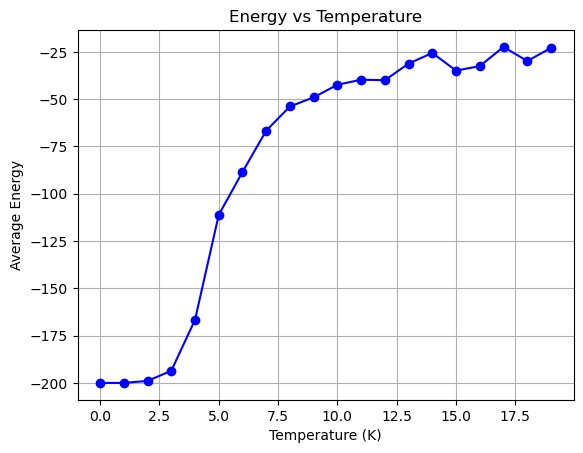

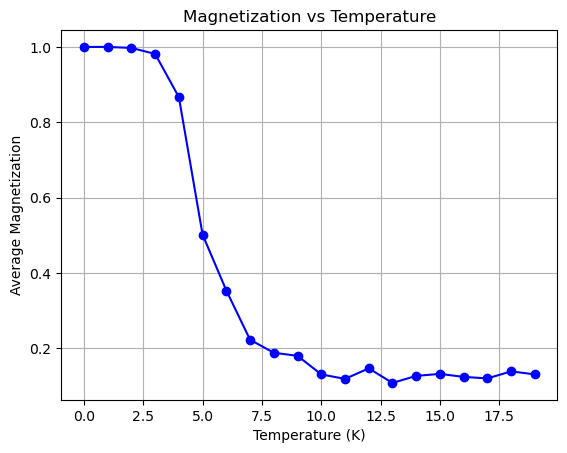

In [14]:
#initizializing arrays and variables
#choosing steps
steps = 40000
N_s = 20000
#initializing arries
energies = []
magnetizations = []
T = np.arange(0.1,10,0.5).tolist()

for T in T:
    #initializing microstate
    micro = randomlattice(10,10)
    #running metropolis algorith
    metropolis(micro, T, steps)
    #steps after equilibriom
    mean_E= []
    mean_M= []
    for i in range(15):
        metropolis(micro,T, N_s)
        mean_E.append(totalenergy(micro))
        mean_M.append(perspinmag(micro))
    #taking averages
    energies.append(np.mean(mean_E))
    magnetizations.append(np.mean(mean_M))
    #plotlattice(micro)
    

# Plot for Energy vs Temperature
plt.figure()
plt.plot( energies, marker='o', linestyle='-', color='b')  # Line graph with points
plt.title("Energy vs Temperature")
plt.xlabel("Temperature (K)")
#plt.xticks(np.arange(0, 10.1, 0.1))
plt.ylabel("Average Energy")
plt.grid(True)
plt.show()

# Plot for Magnetization vs Temperature
plt.figure()
plt.plot( magnetizations, marker='o', linestyle='-', color='b')  # Line graph with points
plt.title("Magnetization vs Temperature")
plt.xlabel("Temperature (K)")
#plt.xticks(np.arange(0, 10.1, 0.1))
plt.ylabel("Average Magnetization")
plt.grid(True)
plt.show()



## 1-D Ising model on a laddder


In [15]:
#New boundry conditions
# since we're starting with a 1 dimensional ladder we dont want verticle periodicity, only horrizontal

def ladderbc(lattice):
    N,M = lattice.shape
    area = normallattice(N,M+2)
    for y in range(N):
        for x in range(M):
            area[y,x] = lattice[y,x]
    area = np.roll(area, 1, 1)
    #implementation of boundry condition
    for z in range(2):
        boundry = normallattice(N,M+2)
        if z == 0:
            boundry = np.roll(area, -2,1)
            area[:,-1] = boundry[:,-1]
        elif z == 1:
            boundry = np.roll(area, 2,1)
            area[:,0] = boundry[:,0]
    return area

#1-D neighborsum

def ladderSum(lattice, i, j):
    '''
    Sums the spins of the lattice points at four neighbor sites to site (i,j).
        Takes into account the size of the lattice in 
        terms of number of rows (i) and columns (j),
        thus implementing periodic boundary conditions.
    '''
    #latticesum bro
    latticesum = 0

    #boundry conditions
    area = ladderbc(lattice)
    
    #sampling space
    sample = normallattice(3,3)
    sample[:,:] = area[i,j:j+3]

    
    
    #summing over sample
    latticesum = sample[1,0] + sample[1,2]
    return latticesum

#ladder energy 

def ladderEnergy(lattice,i,j):
    H = 0
    J_s = 1
    site_energy = -J_s*lattice[i,j]*ladderSum(lattice,i,j) - H*lattice[i,j]
    return site_energy

#calculating Total energy in the ladder
def totalladder(lattice):
    #initializing total energy
    totalenergy=0
    #getting range
    N,M = lattice.shape
    for i in range(N):
        for j in range(M):
            site_energy = ladderEnergy(lattice,i,j)
            totalenergy = totalenergy + site_energy
    return (0.5*totalenergy)

#1-D ladder metropolis

def ladderMetro(lattice, T, N):
    #initializing
    totaldelE = 0
    totaldelM = 0
    #starting loop
    for i in range(N):
        #choosing and flipping a random spin
        temp = np.copy(lattice)
        N_r, M_r = spinpicker(lattice)
        temp = spinflipper(N_r, M_r, temp)

        #calculating change of energy and magnetization
        delE = -2*ladderEnergy(lattice, N_r, M_r)
        M_i = totalmagnetisation(lattice)
        M_f = totalmagnetisation(temp)
        delM = M_f - M_i

        #implementation
        if reject(delE,T) == True:
            lattice[:] = temp
            totaldelE += delE
            totaldelM += delM

    return totaldelE, totaldelM



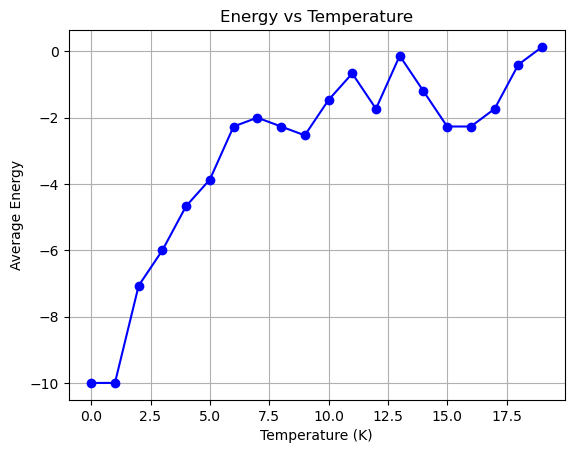

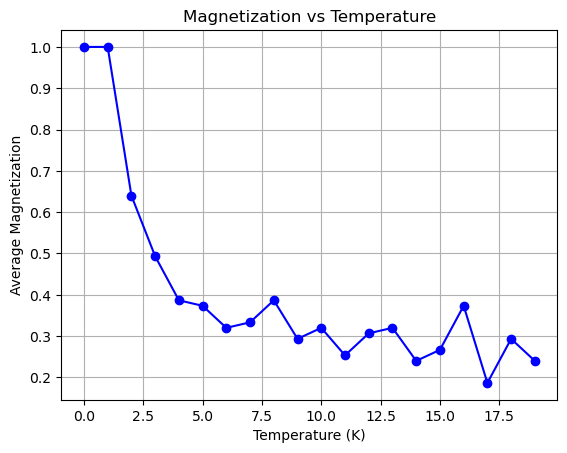

In [16]:
#initizializing arrays and variables
#choosing steps
steps = 40000
N_s = 20000
#initializing arries
L_energies = []
L_magnetizations = []
T = np.arange(0.1,10,0.5).tolist()

for T in T:
    #initializing microstate
    micro = randomlattice(1,10)
    #running metropolis algorith
    ladderMetro(micro, T, steps)
    #steps after equilibriom
    mean_E= []
    mean_M= []
    for i in range(15):
        ladderMetro(micro,T, N_s)
        mean_E.append(totalladder(micro))
        mean_M.append(perspinmag(micro))
    #taking averages
    L_energies.append(np.mean(mean_E))
    L_magnetizations.append(np.mean(mean_M))
    #plotlattice(micro)
    

# Plot for Energy vs Temperature
plt.figure()
plt.plot( L_energies, marker='o', linestyle='-', color='b')  # Line graph with points
plt.title("Energy vs Temperature")
plt.xlabel("Temperature (K)")
#plt.xticks(np.arange(0, 10.1, 0.1))
plt.ylabel("Average Energy")
plt.grid(True)
plt.show()

# Plot for Magnetization vs Temperature
plt.figure()
plt.plot( L_magnetizations, marker='o', linestyle='-', color='b')  # Line graph with points
plt.title("Magnetization vs Temperature")
plt.xlabel("Temperature (K)")
#plt.xticks(np.arange(0, 10.1, 0.1))
plt.ylabel("Average Magnetization")
plt.grid(True)
plt.show()

## Two Ladder System 

In [17]:
#for a 2-Dimensional ladder there are different interaction coefficients for horizontal and vertical interactions, therefore we need to account for that

#Old boundry conditions reimplemented

def TwoLadderbc(lattice):
    N,M = lattice.shape
    area = normallattice(N+2,M+2)
    for y in range(N):
        for x in range(M):
            area[y,x] = lattice[y,x]
    area = np.roll(area, 1, 1)
    area = np.roll(area, 1, 0)
    #implementation of boundry condition
    for z in range(4):
        boundry = normallattice(N+2,M+2)
        if z == 0:
            boundry = np.roll(area, -2,1)
            area[:,-1] = boundry[:,-1]
        elif z == 1:
            boundry = np.roll(area, 2,1)
            area[:,0] = boundry[:,0]
        elif z == 2:
            boundry = np.roll(area, -2,0)
            area[-1,:] = boundry[-1,:]
        elif z ==3:
            boundry = np.roll(area, 2,0)
            area[0,:] = boundry[0,:]
    return area

#1-D neighborsum

def TwoladderSum(lattice, i, j):
    '''
    Sums the spins of the lattice points at four neighbor sites to site (i,j).
        Takes into account the size of the lattice in 
        terms of number of rows (i) and columns (j),
        thus implementing periodic boundary conditions.
    '''
    #latticesum bro
    stairsum = 0
    rungsum = 0

    #boundry conditions
    area = TwoLadderbc(lattice)
    
    #sampling space
    sample = normallattice(3,3)
    sample[:,:] = area[i,j:j+3]
    
    #summing over sample
    stairsum = sample[1,0] + sample[1,2]
    rungsum = sample[0,1] + sample[2,1]

    return stairsum, rungsum

#ladder energy 

def TwoLadderEnergy(lattice,i,j):
    H = 0
    J_s = 1
    J_r = 1
    site_energy = -J_s*lattice[i,j]*TwoladderSum(lattice,i,j)[0] - J_r*lattice[i,j]*TwoladderSum(lattice,i,j)[1] - H*lattice[i,j]
    return site_energy

#calculating Total energy in the ladder
def TotalTwoLadder(lattice):
    #initializing total energy
    totalenergy=0
    #getting range
    N,M = lattice.shape
    for i in range(N):
        for j in range(M):
            site_energy = TwoLadderEnergy(lattice,i,j)
            totalenergy = totalenergy + site_energy
    return (0.5*totalenergy)

#1-D ladder metropolis

def TwoLadderMetro(lattice, T, N):
    #initializing
    totaldelE = 0
    totaldelM = 0
    #starting loop
    for i in range(N):
        #choosing and flipping a random spin
        temp = np.copy(lattice)
        N_r, M_r = spinpicker(lattice)
        temp = spinflipper(N_r, M_r, temp)

        #calculating change of energy and magnetization
        delE = -2*TwoLadderEnergy(lattice, N_r, M_r)
        M_i = totalmagnetisation(lattice)
        M_f = totalmagnetisation(temp)
        delM = M_f - M_i

        #implementation
        if reject(delE,T) == True:
            lattice[:] = temp
            totaldelE += delE
            totaldelM += delM

    return totaldelE, totaldelM


In [22]:
#initizializing arrays and variables
#choosing steps
steps = 40000
N_s = 20000
#initializing arries
T_energies = []
T_magnetizations = []
T = np.arange(0.1,10,0.5).tolist()

for T in T:
    #initializing microstate
    micro = randomlattice(2,10)
    #running metropolis algorith
    TwoLadderMetro(micro, T, steps)
    #steps after equilibriom
    mean_E= []
    mean_M= []
    for i in range(15):
        TwoLadderMetro(micro,T, N_s)
        mean_E.append(TotalTwoLadder(micro))
        mean_M.append(perspinmag(micro))
    #taking averages
    T_energies.append(np.mean(mean_E))
    T_magnetizations.append(np.mean(mean_M))
    #plotlattice(micro)
    

# Plot for Energy vs Temperature
plt.figure()
plt.plot( T_energies, marker='o', linestyle='-', color='b')  # Line graph with points
plt.title("Energy vs Temperature")
plt.xlabel("Temperature (K)")
#plt.xticks(np.arange(0, 10.1, 0.1))
plt.ylabel("Average Energy")
plt.grid(True)
plt.show()

# Plot for Magnetization vs Temperature
plt.figure()
plt.plot( T_magnetizations, marker='o', linestyle='-', color='b')  # Line graph with points
plt.title("Magnetization vs Temperature")
plt.xlabel("Temperature (K)")
#plt.xticks(np.arange(0, 10.1, 0.1))
plt.ylabel("Average Magnetization")
plt.grid(True)
plt.show()

KeyboardInterrupt: 

# Quantum ising model

In [123]:
#turning spin into spinners
def spinner(lattice, i, j):
    if lattice[i, j] == 1:
        spinner = np.array([1,0])
    elif lattice[i, j] == -1:
        spinner = np.array([0,1])
    return spinner

#instituting a time evolution
def TimeEvolution(spin,t):
    #hamiltonian
    j = 1
    h= 0.7
    i = complex(0,1)
    hamiltonian_z= -j*np.array([[1,0],[0,-1]]) @ np.array([[1,0],[0,-1]])
    hamiltonian_x= h*np.array([[0,1],[1,0]])
    #time evolution after time evolution
    spin = spin - ((i*hamiltonian_z*t)/hbar) @ spin - ((i*hamiltonian_x*t)/hbar) @ spin

    return spin

def autocorrelation(spin,spin_t):
    correlation = 0
    correlation += (spin @ np.conjugate(spin_t))
    
    return correlation

def stateprep(lattice):
    lattice[0,0] = 1
    lattice[0,1] = 1
    lattice[0,2] = 1
    lattice[0,3] = -1
    lattice[0,4] = 1
    lattice[0,5] = 1
    lattice[0,6] = -1
    lattice[0,7] = 1
    lattice[1,0] = 1
    lattice[1,1] = 1
    lattice[1,2] = -1
    lattice[1,3] = 1
    lattice[1,4] = 1
    lattice[1,5] = 1
    lattice[1,6] = -1
    lattice[1,7] = 1

    return lattice

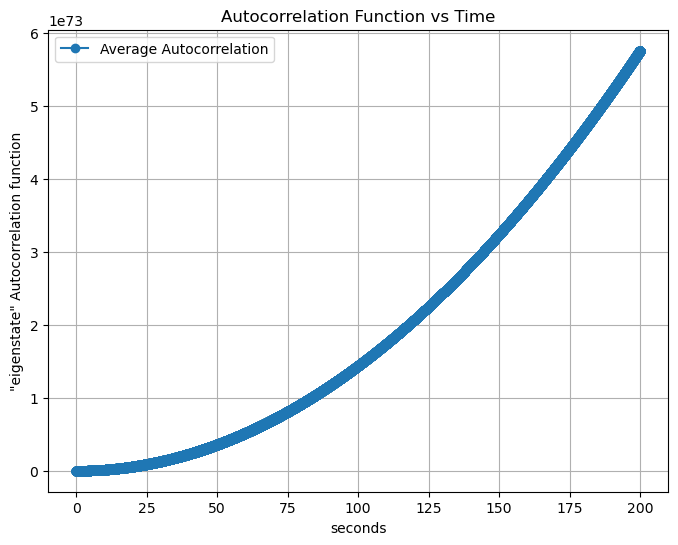

In [124]:
T = np.arange(0,200,0.001).tolist()
test = normallattice(2,8,1)
state = stateprep(test)
n,m = state.shape
avg_autocorrelations = []

for t in T:
    autocorrelation_values = []
    for i in range(n):
        for j in range(m):
            spin = spinner(state,i,j)
            spin_t = spin
            spin_t = TimeEvolution(spin_t,t)
            auto_corr = autocorrelation(spin, spin_t)
            inner_product = np.real(auto_corr * np.conjugate(auto_corr))
            autocorrelation_values.append(inner_product)
    avg_autocorrelations.append(np.sum(autocorrelation_values))

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(T, avg_autocorrelations, marker='o', linestyle='-', label='Average Autocorrelation')
plt.xlabel('seconds')
plt.ylabel('"eigenstate" Autocorrelation function')
plt.title('Autocorrelation Function vs Time')
plt.legend()
plt.grid(True)
plt.show()

4


1
